deep learning proyect based on pheunomia detection using resNet and VGG-16.

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gonzalomajlis
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:20<00:00, 120MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# 1. Configurar parámetros
IMAGE_SIZE = [224, 224]  # VGG16 espera imágenes de 224x224
BATCH_SIZE = 32

# 2. Cargar y preparar los datasets
ds_train = image_dataset_from_directory(
    '../content/chest-xray-pneumonia/chest_xray/train',
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    color_mode='grayscale',  # Cargar como escala de grises
    batch_size=BATCH_SIZE,
    shuffle=True,
)

ds_valid = image_dataset_from_directory(
    '../content/chest-xray-pneumonia/chest_xray/val',
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    shuffle=False,
)

ds_test = image_dataset_from_directory(
    '../content/chest-xray-pneumonia/chest_xray/test',
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    shuffle=False,
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
def convert_to_rgb(image, label):
    # Convertir a float32
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # Convertir de escala de grises a RGB
    image = tf.image.grayscale_to_rgb(image)
    return image, label

# 4. Aplicar transformaciones a los datasets
AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = ds_train.map(convert_to_rgb).cache().prefetch(buffer_size=AUTOTUNE)
ds_valid = ds_valid.map(convert_to_rgb).cache().prefetch(buffer_size=AUTOTUNE)
ds_test = ds_test.map(convert_to_rgb).cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
for images, labels in ds_train.take(1):
    print(f"Forma del batch de imágenes: {images.shape}")
    print(f"Forma de las etiquetas: {labels.shape}")
    print(f"Valores de imagen min/max: {tf.reduce_min(images[0])}, {tf.reduce_max(images[0])}")

Forma del batch de imágenes: (32, 224, 224, 3)
Forma de las etiquetas: (32, 1)
Valores de imagen min/max: 0.0, 253.04910278320312


In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.optimizers import Adamax, SGD               # Optimization algorithms
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt

ResNet50 V2

In [ ]:
image_size = (224, 224)
input_shape = image_size + (3,)

In [ ]:
base_model_resnet = ResNet50V2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)

base_model_resnet.trainable = False

inputs = tf.keras.Input(shape=input_shape)
x = base_model_resnet(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='linear')(x)

model_resnet = Model(inputs=inputs, outputs=outputs)

In [ ]:
model_resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history_resnet = model_resnet.fit(ds_train, validation_data=ds_valid, epochs=epochs)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.8707 - loss: 0.8918 - val_accuracy: 0.6250 - val_loss: 2.1592
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9188 - loss: 0.1911 - val_accuracy: 0.5625 - val_loss: 1.9585
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9230 - loss: 0.1894 - val_accuracy: 0.6875 - val_loss: 1.2490
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9311 - loss: 0.1723 - val_accuracy: 0.6875 - val_loss: 1.1681
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9388 - loss: 0.1613 - val_accuracy: 0.6875 - val_loss: 1.0027
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9448 - loss: 0.1436 - val_accuracy: 0.8125 - val_loss: 0.6833
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9375 - loss: 0.1557 - val_accuracy: 0.6875 - val_loss: 0.9488
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.9406 - loss: 0.1489 - 

In [ ]:
preds_resnet = model_resnet.evaluate(ds_test)
print('loss = ' + str(preds_resnet[0]))
print('accuracy = ' + str(preds_resnet[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7945 - loss: 0.5640
loss = 0.3843393921852112
accuracy = 0.8477563858032227


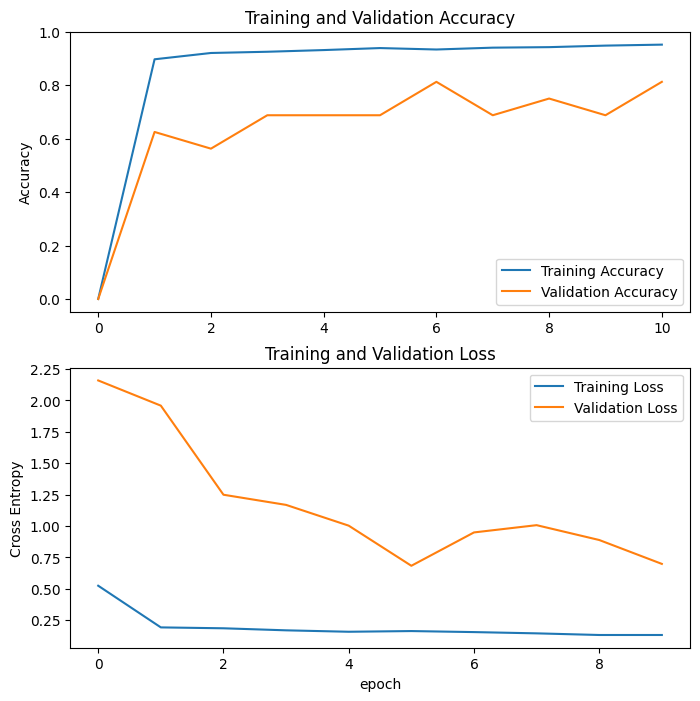

In [ ]:
acc = [0.] + history_resnet.history['accuracy']
val_acc = [0.] + history_resnet.history['val_accuracy']

loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

VGG 16

In [ ]:
base_model_vgg = VGG16(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet'
)

# Congelar el modelo base
base_model_vgg.trainable = False

inputs = tf.keras.Input(shape=input_shape)
#x = preprocess_input(inputs)

# Agregar capas personalizadas para la clasificación
x = base_model_vgg(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='linear')(x)

# Crear el modelo final
model_vgg = Model(inputs=inputs, outputs=outputs)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10

history_vgg = model_vgg.fit(ds_train, validation_data=ds_valid, epochs=epochs)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 216ms/step - accuracy: 0.7785 - loss: 0.6180 - val_accuracy: 0.9375 - val_loss: 0.2484
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 163ms/step - accuracy: 0.9322 - loss: 0.1858 - val_accuracy: 0.9375 - val_loss: 0.2290
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 163ms/step - accuracy: 0.9473 - loss: 0.1333 - val_accuracy: 0.9375 - val_loss: 0.1737
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 165ms/step - accuracy: 0.9474 - loss: 0.1203 - val_accuracy: 1.0000 - val_loss: 0.0887
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 163ms/step - accuracy: 0.9660 - loss: 0.0921 - val_accuracy: 1.0000 - val_loss: 0.0839
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 163ms/step - accuracy: 0.9679 - loss: 0.0858 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 164ms/step - accuracy: 0.9700 - loss: 0.0681 - val_accuracy: 1.0000 - val_loss: 0.0768
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 166ms/step - accuracy: 0.9737 - loss: 0

In [ ]:
preds = model_vgg.evaluate(ds_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.6730 - loss: 1.2844
Loss = 0.7588984966278076
Test Accuracy = 0.8125


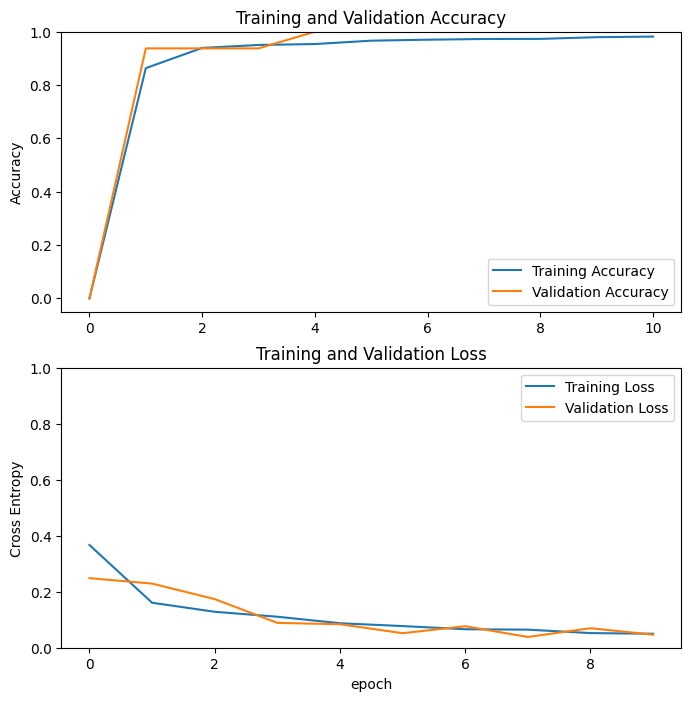

In [ ]:
acc = [0.] + history_vgg.history['accuracy']
val_acc = [0.] + history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()